In [414]:
import matplotlib.pyplot as plt
import numpy as np

Trying to make sure the OPL calculation is done absolutely correctly is tricky, so this notebook demonstrates two equivalent ways to calculate the optical path length, to make sure that the calculation as applied to the electron ray is correct. 

It also demonstrates why the statement "An electromagnetic wave propagating along a path C has the phase shift over C as if it was propagating a path in a vacuum, length of which, is equal to the optical path length of C" is true. 

Define functions to trace the ray in this simple example and calculate the optical path length.

In [415]:
def length(x_start, x_end, z_start, z_end):
    return np.sqrt((x_end - x_start)**2 + (z_end - z_start)**2)

#Calculate optical path length with respect to dz, not ds. ((ds/dz)*dz = ds, where ds/dz = sqrt(1+x^2+y^2) which is ths slope of the ray
def opl(z_start, z_end, x_prime, n, w):
    return n*(1+x_prime**2)**(1/2)*(z_end-z_start)

#Calculate angle in radians of ray with respect to optical axis
def angle(x_prime):
    return np.arccos(1/np.sqrt(1+x_prime**2))*np.sign(x_prime)

#Calculate slope of ray
def rho(x_prime):
    return np.sqrt(1+x_prime**2)

def step_ray(x0, x_prime, z0, z1, n0, n1, w, phase):
    
    #Obtain the next x position of the ray
    x_out = x0 + x_prime*(z1-z0)

    l = length(x0, x_out, z0, z1)
    
    #Calculate the number of wavelengths that fit into the path or the "phase shift".
    l_over_w = l/w
    
    #Calculate the optical path length of the ray. 
    opl_out = opl(z0, z1, x_prime, n0, w)

    #Obtain points along the distance the ray has travelled
    z_pts = np.linspace(0, l, 100)
    
    #Calculate the sine wave representing the ray, and include the update to the phase shift. 
    x_pts = 0.1*np.sin(2 * np.pi / w  * (z_pts)+(phase))

    #Calculate the current angle of the ray
    angle_in = angle(x_prime)
    
    #Obtain the new angle using snell's law
    angle_out = np.arcsin(n0/n1*np.sin(angle_in))
    
    #convert radians to slope
    x_prime_out = np.tan(angle_out)
    
    #Apply a rotation matrix to the sine wave so that we can view it correctly rotated along the rays axis. 
    z_pts_rot = (z_pts)*np.cos(angle_in) - (x_pts)*np.sin(angle_in)
    x_pts_rot = (z_pts)*np.sin(angle_in) + (x_pts)*np.cos(angle_in) 
    
    return x_out, x_prime_out, z_pts_rot, x_pts_rot, z_pts, x_pts, l, opl_out, l_over_w
    
    
    

6.516733947997663 6.516733947997663


Text(0, 0.5, 'Amplitude')

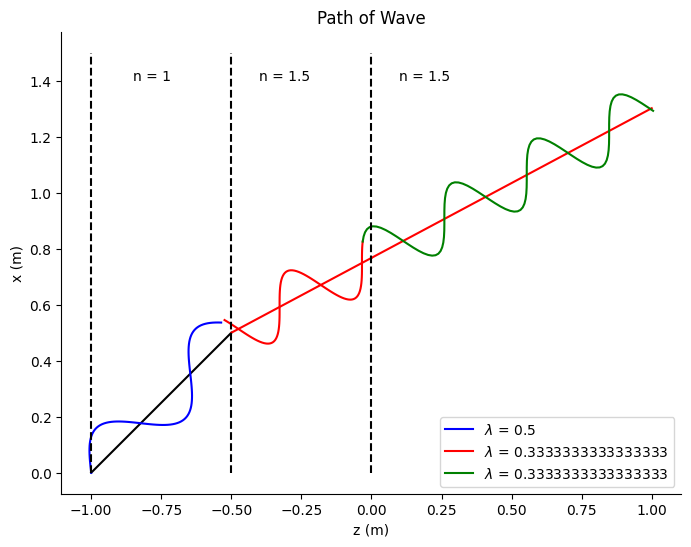

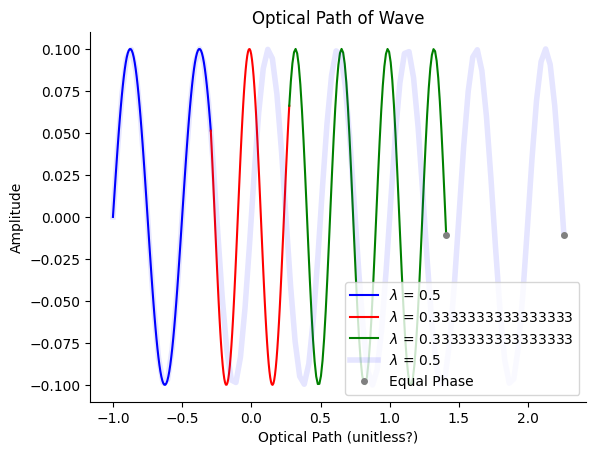

In [416]:
#Define constants
c = 1 #Speed of light
a = 0.1 #amplitude
f = 1.0 #Frequency of wave
w01 = 0.5 #Initial wavelength of wave

#Refractive indices of each interface
n0 = 1 
n1 = 1.5
n2 = 1.5
n3 = 3

#Wavelengths inside each material. Calculated using snell's law. 
w12 = n0/n1*w01
w23 = n1/n2*w12
w34 = n2/n3*w23

#Z positions of the interfaces between mediums
z0 = -1.0
z1 = -0.5
z2 = 0.0
z3 = 1

x0 = 0 #Initial x position
x_prime01 = 1.0 #Intiial x slope

#Step rays through each medium
x1, x_prime12, z_pts_rot01, x_pts_rot01, z_pts01, x_pts01, l01, opl01, l_over_w01 = step_ray(x0, x_prime01, z0, z1, n0, n1, w01, 0)
phase12 = opl01*(np.pi*2)/w01

plt.figure(figsize = (8, 6))
plt.plot([z0, z1], [x0, x1], 'k')
plt.plot(z0+z_pts_rot01, x0+x_pts_rot01, 'b', label = f'$\lambda$ = {w01}')
plt.vlines(z0, 0, 1.5, linestyle = '--', color = 'k')
plt.text(z0+0.15, 1.4, f'n = {n0}')

x2, x_prime23, z_pts_rot12, x_pts_rot12, z_pts12, x_pts12, l12, opl12, l_over_w12 = step_ray(x1, x_prime12, z1, z2, n1, n2, w12, (opl01/w01 % 1)*2*np.pi)

plt.plot([z1, z2], [x1, x2], 'r')
plt.plot(z1+z_pts_rot12, x1+x_pts_rot12, 'r', label = f'$\lambda$ = {w12}')
plt.vlines(z1, 0, 1.5, linestyle = '--', color = 'k')
plt.text(z1+0.1, 1.4, f'n = {n1}')

x3, x_prime34, z_pts_rot23, x_pts_rot23, z_pts23, x_pts23, l23, opl23, l_over_w23 = step_ray(x2, x_prime23, z2, z3, n2, n3, w23, (opl01/w01 % 1)*2*np.pi + (opl12/w01 % 1)*2*np.pi)

plt.plot([z2, z3], [x2, x3], 'r')
plt.plot(z2+z_pts_rot23, x2+x_pts_rot23, 'g', label = f'$\lambda$ = {w23}')
plt.vlines(z2, 0, 1.5, linestyle = '--', color = 'k')
plt.text(z2+0.1, 1.4, f'n = {n2}')
plt.title('Path of Wave')
plt.xlabel('z (m)')
plt.ylabel('x (m)')
plt.legend(loc = 'lower right')
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

#Calculate optical path length.
opl_total = (opl01+opl12+opl23)/w01 

#Note to properly calibrate the optical path length, it needs to be divided by the initial wavelength of the ray (w01).
#This is interesting because it is hardly mentioned anywhere, but the optical path length one calculates will not be correct
#if one does not do this step. It's curious that this makes the optical path length "unitless" then, so I don't know why one must do this. 
#In a way it does not make sense because I thought optical path length has to have a unit of m? Interesetingly there is lots of people asking a similar
#question on stack overflow and otherwise. 
#See here for instance https://physics.stackexchange.com/questions/267716/is-optical-path-length-opl-usually-in-units-of-length-or-wavelength?newreg=06eceb82eb124262b6d853be366a0539
#I actually think that the original calculation assumes for light that your ray is going at the speed of light already. It's the only way to interpret it that makes sense.
#Anyway, it seems that I have the calculation correct now, and that I do need to divide by the initial wavelength of the electron to obtain the correct answer 
#for the actual case. 

#Here we are doing the calculation the simple way, dividing the length travelled by the wavelength in each medium, and summing it together
#to achieve the same result as the optical path length calculation. Honestly this method is probably easier and simpler. 
l_over_w_total = l_over_w01 + l_over_w12 + l_over_w23

print(opl_total, l_over_w_total)

plt.figure(figsize = (10, 6))
plt.plot(z0 + z_pts01, x_pts01, 'b', label = f'$\lambda$ = {w01}')
plt.plot(z0+l01+z_pts12, x_pts12, 'r', label = f'$\lambda$ = {w12}')
plt.plot(z0+l01+l12+ z_pts23, x_pts23, 'g', label = f'$\lambda$ = {w23}')
z_orig = np.linspace(z0+0, z0+opl_total*w01, 100)
x_orig = 0.1*np.sin(2 * np.pi / w01  * (z_orig))
plt.plot(z_orig, x_orig, 'b', alpha = 0.1, linewidth = 4, label = f'$\lambda$ = {w01}')
plt.plot([z0+l01+l12+z_pts23[-1], z_orig[-1]], [x_pts23[-1], x_orig[-1]], 'o', color = 'gray', markersize = 4, label = 'Equal Phase')
plt.legend(loc = 'lower right')
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

plt.title('Optical Path of Wave')
plt.xlabel('Optical Path (unitless?)')
plt.ylabel('Amplitude')
